In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


import os

RANDOM_STATE = 42

In [2]:
bot_df = pd.read_parquet('data/revised_bot_data.parquet')
human_df = pd.read_parquet('data/revised_user_data.parquet')

df = pd.concat([bot_df, human_df], ignore_index=True)

df.head()

,created_at,location,protected,verified,label,followers_count,following_count,tweet_count,listed_count,twt_1,...,description759,description760,description761,description762,description763,description764,description765,description766,description767,description768
0,1615388944,1973,0,0,1,88,172,3083,1,-0.082287,...,0.377144,0.041443,0.321076,-0.305235,0.435472,0.053329,-0.133024,-0.464983,0.579307,0.786032
1,1644743660,3470,0,0,1,2,94,63,0,-0.257648,...,0.286456,0.003284,0.136222,-0.386107,0.321125,-0.247822,0.097500,-0.220485,0.777367,0.106040
2,1597711394,3470,0,0,1,416,515,51,3,-0.014701,...,-0.071037,-0.166699,0.034139,-0.105345,0.406227,0.049027,-0.316269,-0.169635,0.175440,0.541264
3,1327188270,3470,0,0,1,1344,941,4953,1,0.021053,...,-0.209028,-0.428089,-0.021869,0.221049,0.429970,0.053499,-0.324410,-0.037174,0.356606,0.254426
4,1636132828,784,0,0,1,9,17,76,0,-0.129479,...,0.043228,-0.243765,0.279862,0.323460,0.571173,-0.122655,-0.243921,-0.207299,0.000822,0.346163


In [3]:
# Get our data X and y before splitting into train and test sets
# We drop the text columns for now to see if the model even needs them for successful training.
y = df['label']

X = df.drop(columns='label')

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

   created_at  location  protected  verified  followers_count  \
0  1615388944      1973          0         0               88   
1  1644743660      3470          0         0                2   
2  1597711394      3470          0         0              416   
3  1327188270      3470          0         0             1344   
4  1636132828       784          0         0                9   

   following_count  tweet_count  listed_count     twt_1     twt_2  ...  \
0              172         3083             1 -0.082287 -0.043615  ...   
1               94           63             0 -0.257648  0.019856  ...   
2              515           51             3 -0.014701  0.086994  ...   
3              941         4953             1  0.021053 -0.028395  ...   
4               17           76             0 -0.129479 -0.268331  ...   

   description759  description760  description761  description762  \
0        0.377144        0.041443        0.321076       -0.305235   
1        0.286456        0

In [4]:
# Training
'''model = svm.SVC(kernel='linear', random_state=RANDOM_STATE)
model.fit(X_train, y_train)'''

from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=1000000, verbose=1)
model.fit(X_train, y_train)


[LibLinear]iter  1 act 4.286e+00 pre 4.286e+00 delta 1.600e-11 f 8.000e+03 |g| 5.359e+11 CG   1
cg reaches trust region boundary
iter  2 act 6.094e-03 pre 6.094e-03 delta 6.399e-11 f 7.996e+03 |g| 3.811e+08 CG   1
cg reaches trust region boundary
iter  3 act 2.438e-02 pre 2.438e-02 delta 2.560e-10 f 7.996e+03 |g| 5.387e+08 CG   2
cg reaches trust region boundary
iter  4 act 9.739e-02 pre 9.739e-02 delta 1.024e-09 f 7.996e+03 |g| 5.388e+08 CG   2
cg reaches trust region boundary
iter  5 act 3.877e-01 pre 3.877e-01 delta 4.095e-09 f 7.996e+03 |g| 5.374e+08 CG   2
cg reaches trust region boundary
iter  6 act 1.520e+00 pre 1.520e+00 delta 1.638e-08 f 7.995e+03 |g| 5.336e+08 CG   2
cg reaches trust region boundary
iter  7 act 5.606e+00 pre 5.606e+00 delta 6.552e-08 f 7.994e+03 |g| 5.166e+08 CG   2
cg reaches trust region boundary
iter  8 act 1.701e+01 pre 1.528e+01 delta 1.740e-07 f 7.988e+03 |g| 4.518e+08 CG   2
iter  9 act 2.434e-04 pre 2.434e-04 delta 1.740e-07 f 7.971e+03 |g| 4.031e+09 

LinearSVC(max_iter=1000000, verbose=1)

Accuracy: 0.61
F1 Score: 0.72
Precision: 0.57
Recall: 0.98


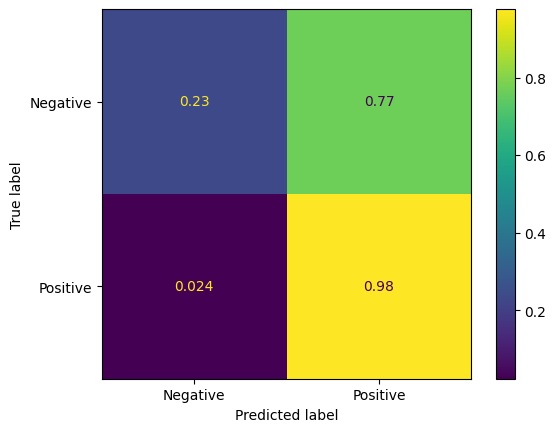

In [5]:
# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()


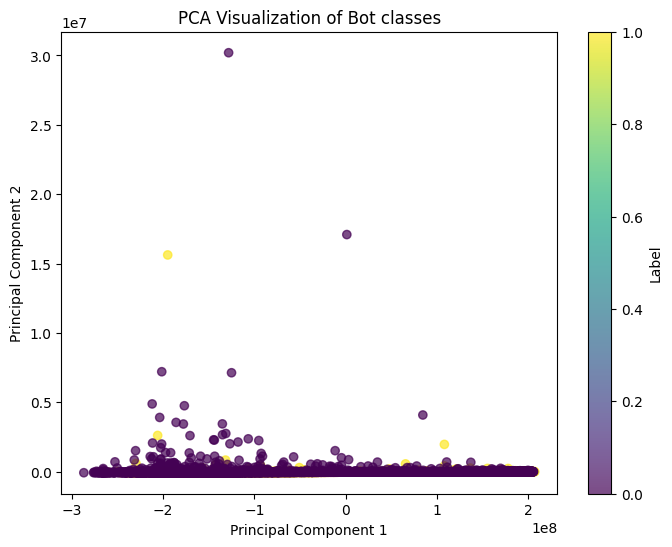

In [6]:
# Inspiration: https://www.datacamp.com/tutorial/introduction-t-sne
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# PCA reduces feature space by finding directions that capture the most variance
pca = PCA(n_components=3, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Bot classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Label')
plt.show()

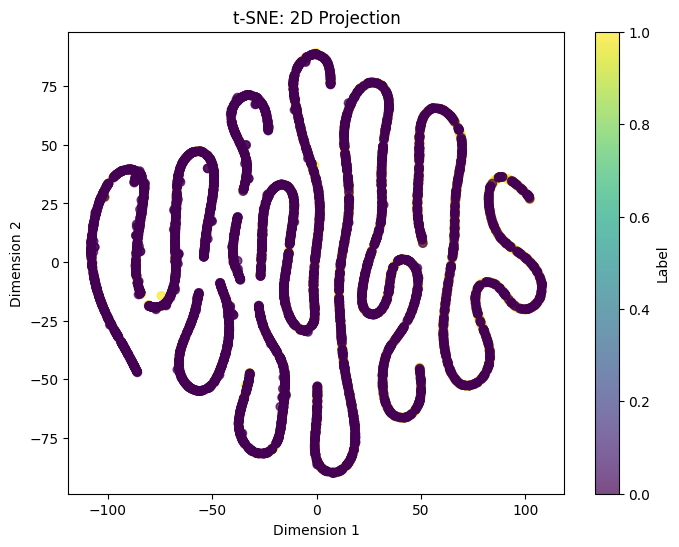

In [7]:
# Interesting, but doesn't preserve local structure very well, let's look at t-SNE
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=RANDOM_STATE).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("t-SNE: 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Label')
plt.show()

In [8]:
# We'll try with a Random Forest now
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.75
F1 Score: 0.74
Precision: 0.79
Recall: 0.70


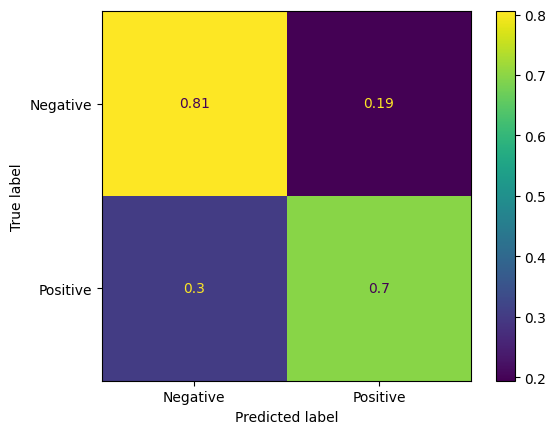

In [9]:
y_hat = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()

Accuracy: 0.66
F1 Score: 0.66
Precision: 0.66
Recall: 0.67


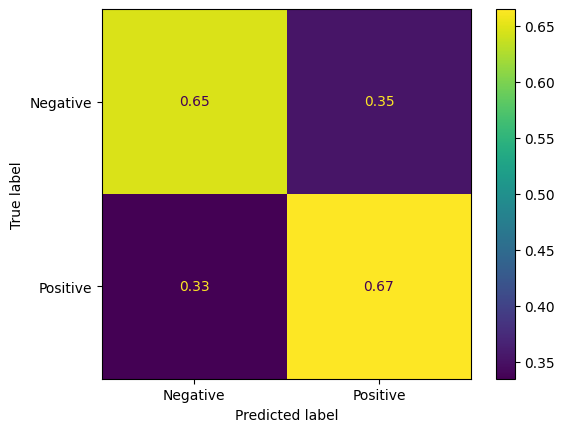

In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree.fit(X_train, y_train)

y_hat = tree.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()

Accuracy: 0.53
F1 Score: 0.68
Precision: 0.52
Recall: 0.99


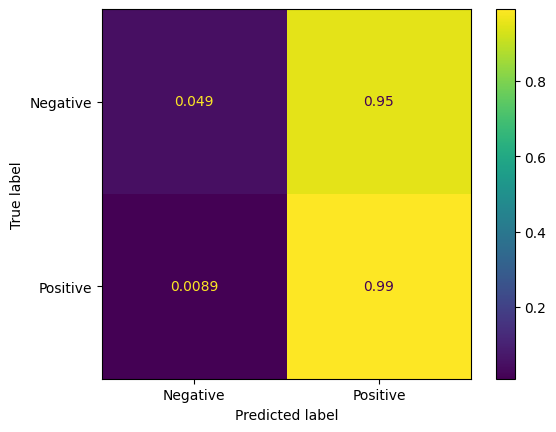

In [11]:
# Naive-Bayes (with text)
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

y_hat = bayes_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()

Accuracy: 0.56
F1 Score: 0.57
Precision: 0.56
Recall: 0.59


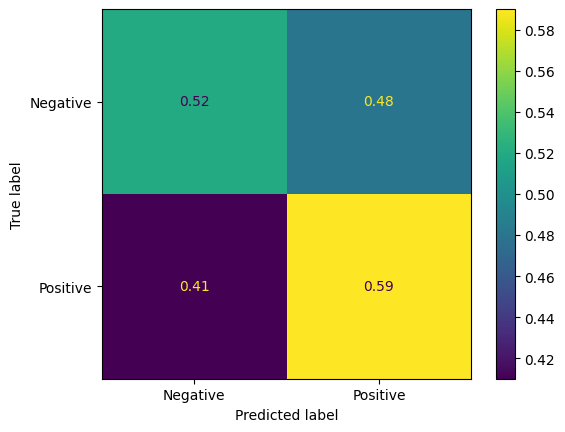

In [12]:
# k-Nearest Neighbors (without text)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


import os

RANDOM_STATE = 42

In [14]:
# Deep Learning Model
# inspired by: https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
from deep_learning.dataloader import Bot_Dataset
from deep_learning.nn_model import DNN
from torch.utils.data import random_split, DataLoader

<h2>Add ensembled methods</h2>

<h3>Voting</h3>

In [16]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('svm', model),
    ('rf', rf_model),
    ('dt', tree),
    ('gnb', bayes_model),
    ('knn', knn)
], voting='hard')  # or 'soft' if models support `predict_proba`

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

[LibLinear]iter  1 act 4.286e+00 pre 4.286e+00 delta 1.600e-11 f 8.000e+03 |g| 5.359e+11 CG   1
cg reaches trust region boundary
iter  2 act 6.094e-03 pre 6.094e-03 delta 6.399e-11 f 7.996e+03 |g| 3.811e+08 CG   1
cg reaches trust region boundary
iter  3 act 2.438e-02 pre 2.438e-02 delta 2.560e-10 f 7.996e+03 |g| 5.387e+08 CG   2
cg reaches trust region boundary
iter  4 act 9.739e-02 pre 9.739e-02 delta 1.024e-09 f 7.996e+03 |g| 5.388e+08 CG   2
cg reaches trust region boundary
iter  5 act 3.877e-01 pre 3.877e-01 delta 4.095e-09 f 7.996e+03 |g| 5.374e+08 CG   2
cg reaches trust region boundary
iter  6 act 1.520e+00 pre 1.520e+00 delta 1.638e-08 f 7.995e+03 |g| 5.336e+08 CG   2
cg reaches trust region boundary
iter  7 act 5.606e+00 pre 5.606e+00 delta 6.552e-08 f 7.994e+03 |g| 5.166e+08 CG   2
cg reaches trust region boundary
iter  8 act 1.701e+01 pre 1.528e+01 delta 1.740e-07 f 7.988e+03 |g| 4.518e+08 CG   2
iter  9 act 2.434e-04 pre 2.434e-04 delta 1.740e-07 f 7.971e+03 |g| 4.031e+09 

Accuracy: 0.67
F1 Score: 0.73
Precision: 0.62
Recall: 0.91


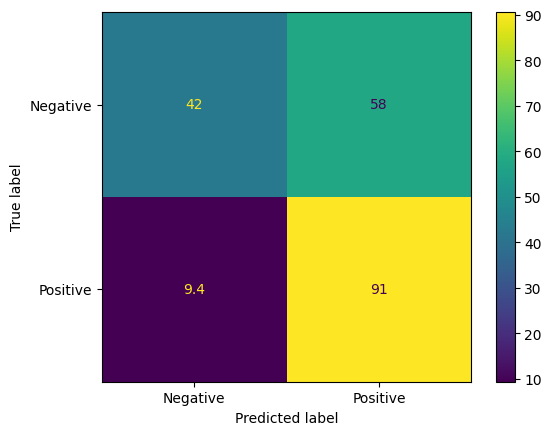

In [21]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_pred, normalize='true')

# line straight from copilot
cm_normalized = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Negative', 'Positive']).plot()
plt.show()

<h3>Stacking</h3>